<a href="https://colab.research.google.com/github/SChiu-project/CUSCS-m3/blob/main/Class_5_Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face detection

Preparation - import library

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os, shutil
import math
%matplotlib inline

import and upload photos

In [ ]:
# show all photos in the folder as a list
dir = 'masks'
image_path = [file.path for file in os.scandir(dir) if file.name.split(".")[-1] == 'png'] # validation to check png
print(image_path)

['masks/16.png', 'masks/2.png', 'masks/10.png', 'masks/0.png', 'masks/15.png', 'masks/12.png', 'masks/5.png', 'masks/17.png', 'masks/11.png', 'masks/14.png', 'masks/13.png']


In [ ]:
qty_mask_img = len(image_path)
qty_mask_img

11

check photo

In [ ]:
np.random.seed(1)
mask_num = np.random.randint(qty_mask_img)
mask_num

5

In [ ]:
image_path[mask_num]

'masks/12.png'

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
(451, 553, 4)


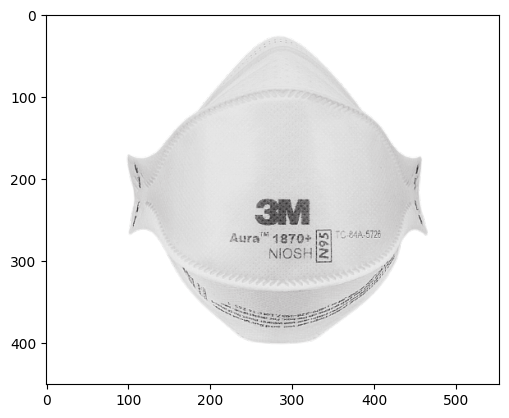

In [ ]:
img_mask_original = cv2.imread(image_path[mask_num], cv2.IMREAD_UNCHANGED)
print(img_mask_original)
print(img_mask_original.shape) # resolution
implot = plt.imshow(img_mask_original)

In [ ]:
img_mask_bgr = img_mask_original[:,:,:]
print(img_mask_bgr)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [ ]:
#png (alpha channel) vs jpeg (no transparant)

In [ ]:
# extract rgb (3x3) from gbra (4 x4)
img_mask_bgr = img_mask_original[:,:,0:3]
print(img_mask_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
# extract the alpha channel
img_mask_alpha = img_mask_original[:,:,3]
print(img_mask_alpha)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
_, item_mask = cv2.threshold(img_mask_alpha, 220, 255, cv2.THRESH_BINARY) # fall into range 220 - 255
item_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Text(0.5, 1.0, 'alpha')

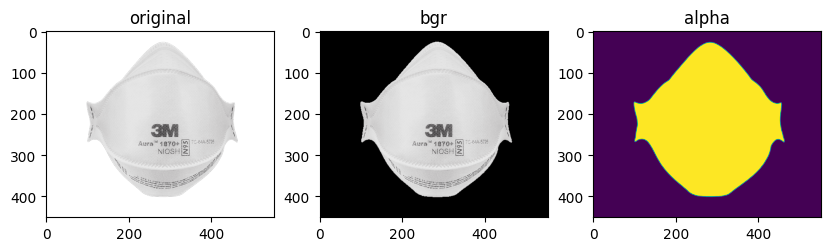

In [ ]:
plt.figure(figsize=[10,10])

plt.subplot(1,3,1)
plt.imshow(img_mask_original)
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(img_mask_bgr)
plt.title('bgr')

plt.subplot(1,3,3)
plt.imshow(img_mask_alpha)
plt.title('alpha')

dlib

In [ ]:
!pip install dlib

# ! is shell command
# % is

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dlib

In [ ]:
predictor_path = 'shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

face: rectangles[[(295, 542) (849, 1096)]]
scores: [1.7402098812593336]
idx: [0]


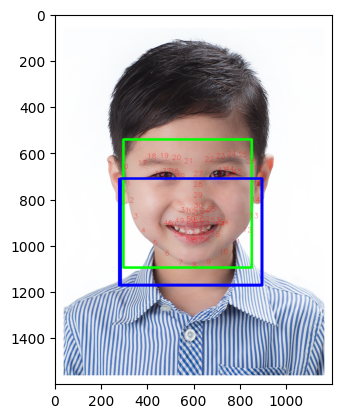

In [ ]:
idx0 = 'idx0.jpg'
img_idx0 = cv2.imread(idx0)
#
if img_idx0 is None:
  print('dead photo{}'.format(idx0))
else:
  faces, scores, idx = detector.run(img_idx0, 1)
  print('face:', faces)
  print('scores:', scores)
  print('idx:', idx)
  # draw on the photo the rectangler
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx0, (d.left(), d.top()),(d.right(),d.bottom()), (0,255,0), 10)
    shape = predictor(img_idx0, d)
    for i in range(68):
      # cv2.circle(img_idx0, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10) # put a circle
      cv2.putText(img_idx0, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255)) # put numbers
      (x_min, y_min), (x_max, y_max) = mouth_detection(img_idx0, predictor, d)
      cv2.rectangle(img_idx0, (x_min, y_min), (x_max, y_max), (255,0,0), 3)
  plt.imshow(img_idx0[:,:,::-1]) # row, column, layers

face: rectangles[[(498, 468) (765, 736)]]
scores: [0.36797175752133393]
idx: [2]


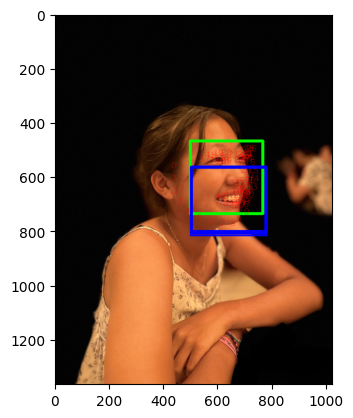

In [ ]:
idx1 = 'idx1.jpg'
img_idx1 = cv2.imread(idx1)
# print(img_idx1)
if img_idx1 is None:
  print('dead photo{}'.format(idx1))
else:
  faces, scores, idx = detector.run(img_idx1, 1)
  print('face:', faces)
  print('scores:', scores)
  print('idx:', idx)
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx1, (d.left(), d.top()),(d.right(),d.bottom()), (0,255,0), 10)
    shape = predictor(img_idx1, d)
    for i in range(68):
      # cv2.circle(img_idx1, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10) # put a circle
      cv2.putText(img_idx1, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255)) # put numbers
      (x_min, y_min), (x_max, y_max) = mouth_detection(img_idx1, predictor, d)
      cv2.rectangle(img_idx1, (x_min, y_min), (x_max, y_max), (255,0,0), 3)
  plt.imshow(img_idx1[:,:,::-1])

face: rectangles[[(206, 502) (872, 1168)]]
scores: [0.4803695832558099]
idx: [1]


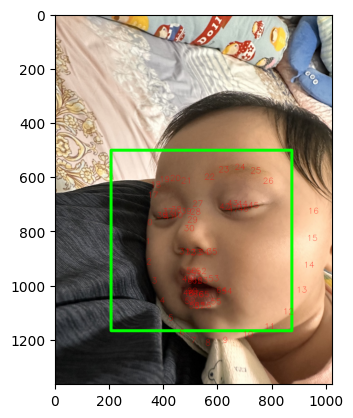

In [ ]:
idx2 = 'idx2.jpg'
img_idx2 = cv2.imread(idx2)
# print(img_idx2)
if img_idx2 is None:
  print('dead photo{}'.format(idx2))
else:
  faces, scores, idx = detector.run(img_idx2, 1)
  print('face:', faces)
  print('scores:', scores)
  print('idx:', idx)
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx2, (d.left(), d.top()),(d.right(),d.bottom()), (0,255,0), 10)
    shape = predictor(img_idx2, d)
    for i in range(68):
      # cv2.circle(img_idx2, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10) # put a circle
      cv2.putText(img_idx2, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255)) # put numbers
  plt.imshow(img_idx2[:,:,::-1])

face: rectangles[[(121, 166) (157, 202)]]
scores: [0.10082548759798637]
idx: [3]


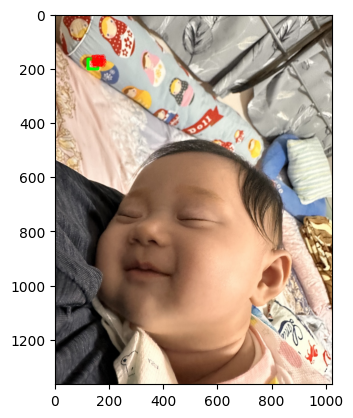

In [ ]:
idx3 = 'idx3.jpg'
img_idx3 = cv2.imread(idx3)
# print(img_idx3)
if img_idx3 is None:
  print('dead photo{}'.format(idx3))
else:
  faces, scores, idx = detector.run(img_idx3, 1)
  print('face:', faces)
  print('scores:', scores)
  print('idx:', idx)
  plt.imshow(img_idx3[:,:,::-1])
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx3, (d.left(), d.top()),(d.right(),d.bottom()), (0,255,0), 10)
    shape = predictor(img_idx3, d)
    for i in range(68):
      # cv2.circle(img_idx3, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10) # put a circle
      cv2.putText(img_idx3, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255)) # put numbers
  plt.imshow(img_idx3[:,:,::-1])

face: rectangles[[(1526, 3504) (1680, 3659)], [(889, 4467) (1044, 4622)], [(1521, 1357) (1707, 1543)], [(242, 2554) (428, 2740)], [(253, 3504) (408, 3659)], [(1521, 4453) (1707, 4638)], [(882, 5381) (1067, 5567)], [(253, 425) (408, 580)], [(889, 3521) (1044, 3676)], [(889, 425) (1044, 580)], [(242, 1357) (428, 1543)], [(242, 4453) (428, 4638)], [(1521, 2575) (1707, 2760)], [(860, 2545) (1083, 2768)], [(1521, 387) (1707, 573)], [(882, 1357) (1067, 1543)], [(242, 5381) (428, 5567)]]
scores: [2.9567411579622145, 2.8182566799653883, 2.5602873005403395, 2.4413579144014235, 2.387556854678523, 2.353928390933406, 2.2938407101167555, 2.291576687289607, 2.2866900600923414, 2.112008396579158, 2.006424728824031, 1.7908423580659742, 1.7678559460176344, 1.6113384403718825, 1.2960432209504957, 1.098832432223689, 1.0402982868684645]
idx: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


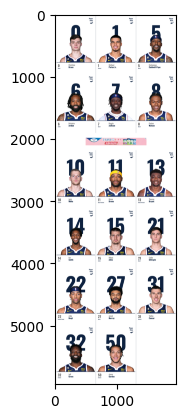

In [ ]:
dnr = 'Denver-Nuggets-Roster.png'
img_dnr = cv2.imread(dnr)
# print(img_dnr)
if img_dnr is None:
  print('dead photo{}'.format(dnr))
else:
  faces, scores, idx = detector.run(img_dnr, 1)
  print('face:', faces)
  print('scores:', scores)
  print('idx:', idx)
  plt.imshow(img_dnr[:,:,::-1])

In [ ]:
def mouth_detection(img, predictor, d):
  face_height = d.bottom() - d.top()
  face_width = d.right() - d.left()

  shape = predictor(img, d)

  x = list()
  y = list()

  for i in range(48,68):
    x.append(shape.part(i).x)
    y.append(shape.part(i).y)

  height_margin = face_height//3
  width_margin = face_width//3

  y_max = min((max(y) + height_margin), img.shape[0])
  y_min = max((min(y) - height_margin),0)
  x_max = min((max(x) + width_margin), img.shape[1])
  x_min = max((min(x) - width_margin),0)

  return (x_min, y_min), (x_max, y_max)